In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from openpyxl import workbook
import os

In [3]:
Transactions=pd.read_excel("C:\\Users\\HP PAVILION\Downloads\\KPMG_VI_New_raw_data_update_final (5).xlsx",sheet_name=0)
Transactions.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
5,6,25,2339,2017-03-08,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031.0
6,7,22,1542,2017-04-21,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,39915.0
8,9,67,1305,2017-08-10,0.0,Approved,Solex,Standard,medium,large,1071.23,380.74,33455.0
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,38216.0


In [4]:
Customer_Demographic=pd.read_excel("C:\\Users\\HP PAVILION\Downloads\\KPMG_VI_New_raw_data_update_final (5).xlsx",sheet_name=1)
Customer_Demographic.head(10)

C:\Users\HPPAVI~1\AppData\Local\Temp/ipykernel_7124/311004274.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  Customer_Demographic=pd.read_excel("C:\\Users\\HP PAVILION\Downloads\\KPMG_VI_New_raw_data_update_final (5).xlsx",sheet_name=1)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0


In [5]:
Customer_Address=pd.read_excel("C:\\Users\\HP PAVILION\Downloads\\KPMG_VI_New_raw_data_update_final (5).xlsx",sheet_name=2)
Customer_Address.head(10)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
5,7,4 Delaware Trail,2210,NSW,Australia,9
6,8,49 Londonderry Lane,2650,NSW,Australia,4
7,9,97736 7th Trail,2023,NSW,Australia,12
8,11,93405 Ludington Park,3044,VIC,Australia,8
9,12,44339 Golden Leaf Alley,4557,QLD,Australia,4


In [6]:
Transactions.info


<bound method DataFrame.info of        transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1.0

CHECKING FOR NULLS IN THE TRANSACTION TABLE

In [7]:
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [8]:
Transactions["customer_id"].nunique(dropna=False)

3494

In [9]:
len(Transactions["customer_id"])

20000

CHECKING FOR NULLS IN THE CUSTOMER DEMOGRAPHIC TABLE

In [10]:
#Customer_Demographic TABLE has n/a as a nan value but cant be picked up
missing_values=["n/a",np.nan]
Customer_Demographic=pd.read_excel("C:\\Users\\HP PAVILION\Downloads\\KPMG_VI_New_raw_data_update_final (5).xlsx", na_values=missing_values)
Customer_Demographic.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [11]:
len(Customer_Demographic["customer_id"])

20000

In [12]:
Customer_Demographic.nunique(dropna=False)

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   3
order_status                   2
brand                          7
product_line                   5
product_class                  4
product_size                   4
list_price                   296
standard_cost                104
product_first_sold_date      101
dtype: int64

CHECKING FOR NULLS IN THE CUSTOMER ADDRESS TABLE

In [13]:
Customer_Address.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [14]:
len(Customer_Address["customer_id"])

3999

In [15]:
Customer_Address.nunique(dropna=False)

customer_id           3999
address               3996
postcode               873
state                    3
country                  1
property_valuation      12
dtype: int64

In [16]:
Customer_Address["customer_id"].value_counts

<bound method IndexOpsMixin.value_counts of 0          1
1          2
2          4
3          5
4          6
        ... 
3994    3999
3995    4000
3996    4001
3997    4002
3998    4003
Name: customer_id, Length: 3999, dtype: int64>

VISUAL PRESENTATION OF THE NULLS

<AxesSubplot:>

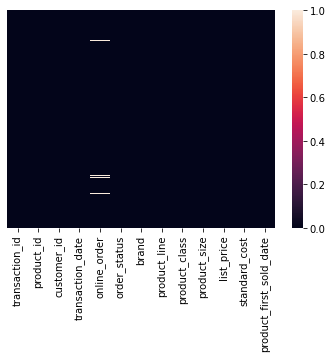

In [17]:
#TRANSACTIONS NULLS VISUAL
sns.heatmap(Transactions.isnull(), yticklabels=False)

<AxesSubplot:>

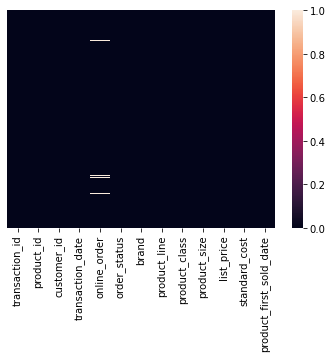

In [18]:
#CUSTOMER DEMOGRAPHIC NULLS VISUAL
sns.heatmap(Customer_Demographic.isnull(), yticklabels=False, annot=False)

<AxesSubplot:>

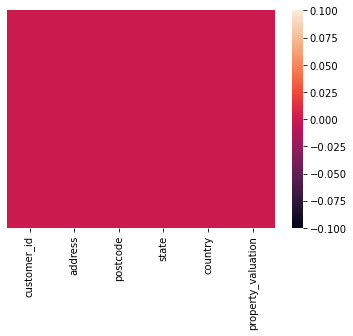

In [19]:
#CUSTOMER ADDRESS NULLS VISUAL
sns.heatmap(Customer_Address.isnull(), yticklabels=False)

In [25]:
##DEALING WITH NULL VALUES
#DROPPING ALL NULL VALUES(NaN)
Transactions.dropna(inplace=True)



In [27]:
#Confirmation that all the nulls are dropped
Transactions.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [28]:
#DROPPING ALL NULL VALUES(NaN)
Customer_Demographic.dropna(inplace=True)

In [30]:
#CONFIRMATION OF THE DROP
Customer_Demographic.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64